In [1]:
import numpy as np
from scipy.optimize import root_scalar
import matplotlib.pyplot as plt

In [36]:
A = 1
alpha = 0.6
delta = 0.08
gamma = 0.5
beta = 0.98

rho = 1/beta - 1

k = np.arange(500)
kbar = (alpha*A/(rho+delta))**(1/(1-alpha))
cbar = f(kbar) - delta*kbar

f = lambda k: A*k**alpha


def c_for_stationary_k(k):
    sol = root_scalar(lambda c,k: f(k) - delta*k - c, args = (k,), bracket=(0,2*kbar))
    return sol.root

vec_c_for_stationary_k = np.vectorize(c_for_stationary_k)

cstar = vec_c_for_stationary_k(k)



In [27]:
np.max(cstar)

8.215838133408013

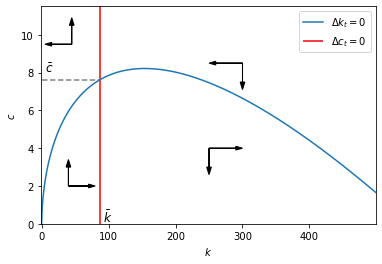

In [94]:
f=plt.figure()
ax = plt.gca()
ax.set_xlim([-1, np.max(k)])
ax.set_ylim([0, 1.4*np.max(cstar)])
plt.plot(k,cstar,label='$\\Delta k_t = 0$')
plt.vlines(kbar, 0, 1.4*np.max(cstar), color='red', label='$\\Delta c_t = 0$')
plt.hlines(cbar, 0, kbar, colors='grey', linestyles='dashed')
plt.text(5, 1.05*cbar, '$\\bar{c}$', fontsize=12)
plt.text(1.05*kbar, 0.1, '$\\bar{k}$', fontsize=12)
plt.xlabel("$k$")
plt.ylabel("$c$")
plt.legend()

plt.arrow(250, 4 , 0, -1, width = 0.1, head_width = 7, head_length = 0.4, color='k')
plt.arrow(250, 4 , 40, 0, width = 0.01, head_width = 0.2, head_length = 10, color='k')

plt.arrow(40, 2 , 0, 1, width = 0.1, head_width = 7, head_length = 0.4, color='k')
plt.arrow(40, 2 , 30, 0, width = 0.01, head_width = 0.2, head_length = 10, color='k')

plt.arrow(300, 8.5 , 0, -1, width = 0.1, head_width = 7, head_length = 0.4, color='k')
plt.arrow(300, 8.5 , -40, 0, width = 0.01, head_width = 0.2, head_length = 10, color='k')

plt.arrow(45, 9.5 , 0, 1, width = 0.1, head_width = 7, head_length = 0.4, color='k')
plt.arrow(45, 9.5 , -30, 0, width = 0.01, head_width = 0.2, head_length = 10, color='k')


plt.show()
f.savefig("phaseportrait.pdf")